<a href="https://colab.research.google.com/github/felipepizzinato/EDA-EUA/blob/main/co2_eua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv("emissions.csv")

Saving emissions.csv to emissions.csv


# Introdução

O dataset coletado possui dados em relação à emissão de dióxido de carbono (CO2) por ano em cada estado dos Estados Unidos. A seguir terá a apresentação dos dados que fazem parte do dataset:

# Colunas
Antes de tudo, é importante apresnetar sobre as colunas existentes:
- year: Ano de da informação coletada;

- state-name: Nome do estado da informação coletada;

- sector-name: Nome do setor que realizou a emissão direta do CO2;

- fuel-name: Tipo do combustível que gerou energia;

- values: Valores totais de CO2 emitido;

In [ ]:
print(df.columns)

Index(['year', 'state-name', 'sector-name', 'fuel-name', 'value'], dtype='object')


# Anos que possuem registro
- 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021

In [ ]:
print(df['year'].unique())

[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]


# Estados que possuem registro
- Alabama, Alaska, Arizona, Arkansas, California, Colorado, Connecticut, Delaware, District of Columbia, Florida, Georgia, Hawaii, Idaho, Illinois, Indiana, Iowa, Kansas, Kentucky, Louisiana, Maine, Maryland, Massachusetts, Michigan, Minnesota, Mississippi, Missouri, Montana, Nebraska, Nevada, New Hampshire, New Jersey, New Mexico, New York, North Carolina, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Carolina, South Dakota, Tennessee, Texas, United States, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming



In [ ]:
print(df['state-name'].unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'United States' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


# Setores que possuem registro
- Emissões industriais de dióxido de carbono
- Emissões totais de dióxido de carbono de todos os setores
- Emissões residenciais de dióxido de carbono
- Emissões comerciais de dióxido de carbono
- Emissões de dióxido de carbono do transporte
- Emissões de dióxido de carbono de geração de energia elétrica


In [ ]:
print(df['sector-name'].unique())

['Industrial carbon dioxide emissions'
 'Total carbon dioxide emissions from all sectors'
 'Residential carbon dioxide emissions'
 'Commercial carbon dioxide emissions'
 'Transportation carbon dioxide emissions'
 'Electric Power carbon dioxide emissions']


# Fontes de energia que possuem registro
- Carvão
- Petróleo
- Gás Natural
- Todos os Combustíveis


In [ ]:
print(df['fuel-name'].unique())

['Coal' 'Petroleum' 'Natural Gas' 'All Fuels']


# Tratamento de dados para os gráficos
*como não ter nenhuma linha vazia, será realizado um tratamento especial pra cada gráfico

In [ ]:
print(df.isnull().sum())

year           0
state-name     0
sector-name    0
fuel-name      0
value          0
dtype: int64


In [ ]:
df_filtered = df[df['state-name'] == 'United States']
df_co2_total = df_filtered[df_filtered['sector-name'] == 'Total carbon dioxide emissions from all sectors']
df_co2_total = df_co2_total[df_co2_total['fuel-name'] == 'All Fuels']

df_co2 = df_co2_total[['year', 'value']]

df_co2_total_por_ano = df_co2.groupby('year').sum().reset_index()

print(df_co2_total_por_ano.head())



   year        value
0  1970  4252.119759
1  1971  4297.282895
2  1972  4516.734358
3  1973  4713.330487
4  1974  4541.830703


# Gráfico que representa o consumo total de emissão de CO2 nos EUA por ano.

Abaixo é apresentado o aumento da emissão ao longo dos anos, e felizmente, após o ano de 2007, uma drática queda na emissão.

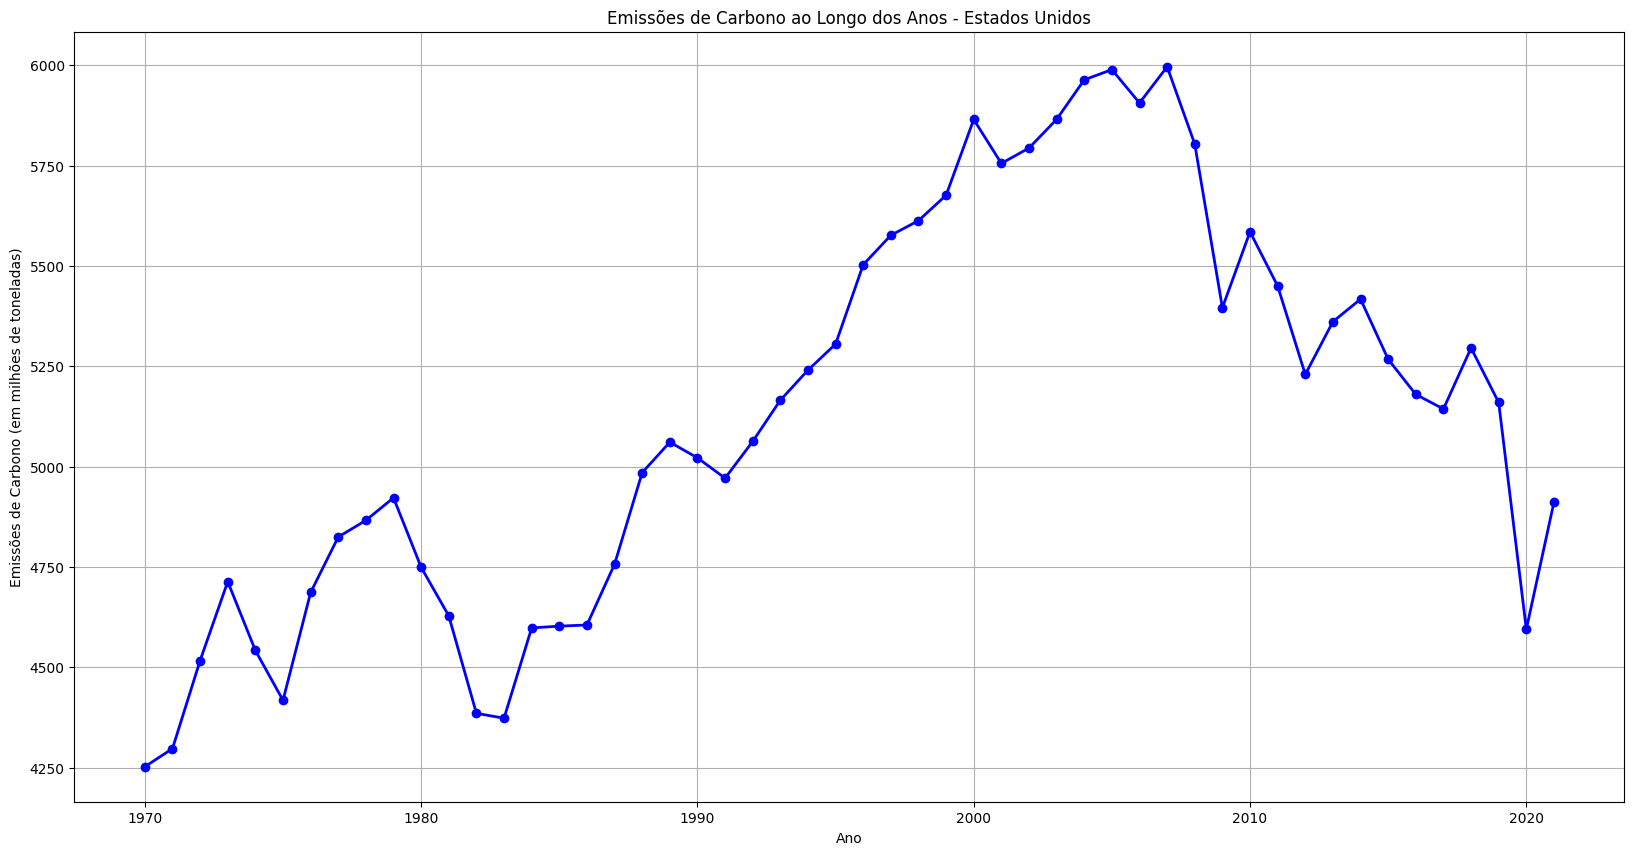

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(df_co2_total_por_ano['year'], df_co2_total_por_ano['value'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title("Emissões de Carbono ao Longo dos Anos - Estados Unidos")
plt.xlabel("Ano")
plt.ylabel("Emissões de Carbono (em milhões de toneladas)")
plt.grid(True)
plt.show()


In [ ]:
df_filtered = df[df['state-name'] != 'United States']
df_co2_total = df_filtered[df_filtered['sector-name'] == 'Total carbon dioxide emissions from all sectors']
df_co2_total = df_co2_total[df_co2_total['fuel-name'] == 'All Fuels']

print(df_filtered.head())

df_co2 = df_co2_total[['state-name', 'value']]

df_co2_total_por_estado = df_co2.groupby('state-name').sum().reset_index()


   year state-name                                      sector-name  \
0  1970    Alabama              Industrial carbon dioxide emissions   
1  1970    Alabama              Industrial carbon dioxide emissions   
2  1970    Alabama              Industrial carbon dioxide emissions   
3  1970    Alabama              Industrial carbon dioxide emissions   
4  1970    Alabama  Total carbon dioxide emissions from all sectors   

     fuel-name       value  
0         Coal   26.721507  
1    Petroleum    3.577779  
2  Natural Gas    8.944097  
3    All Fuels   39.243383  
4    All Fuels  102.646851  


# Gráfico que representa a emissão total de todos os anos por estado.

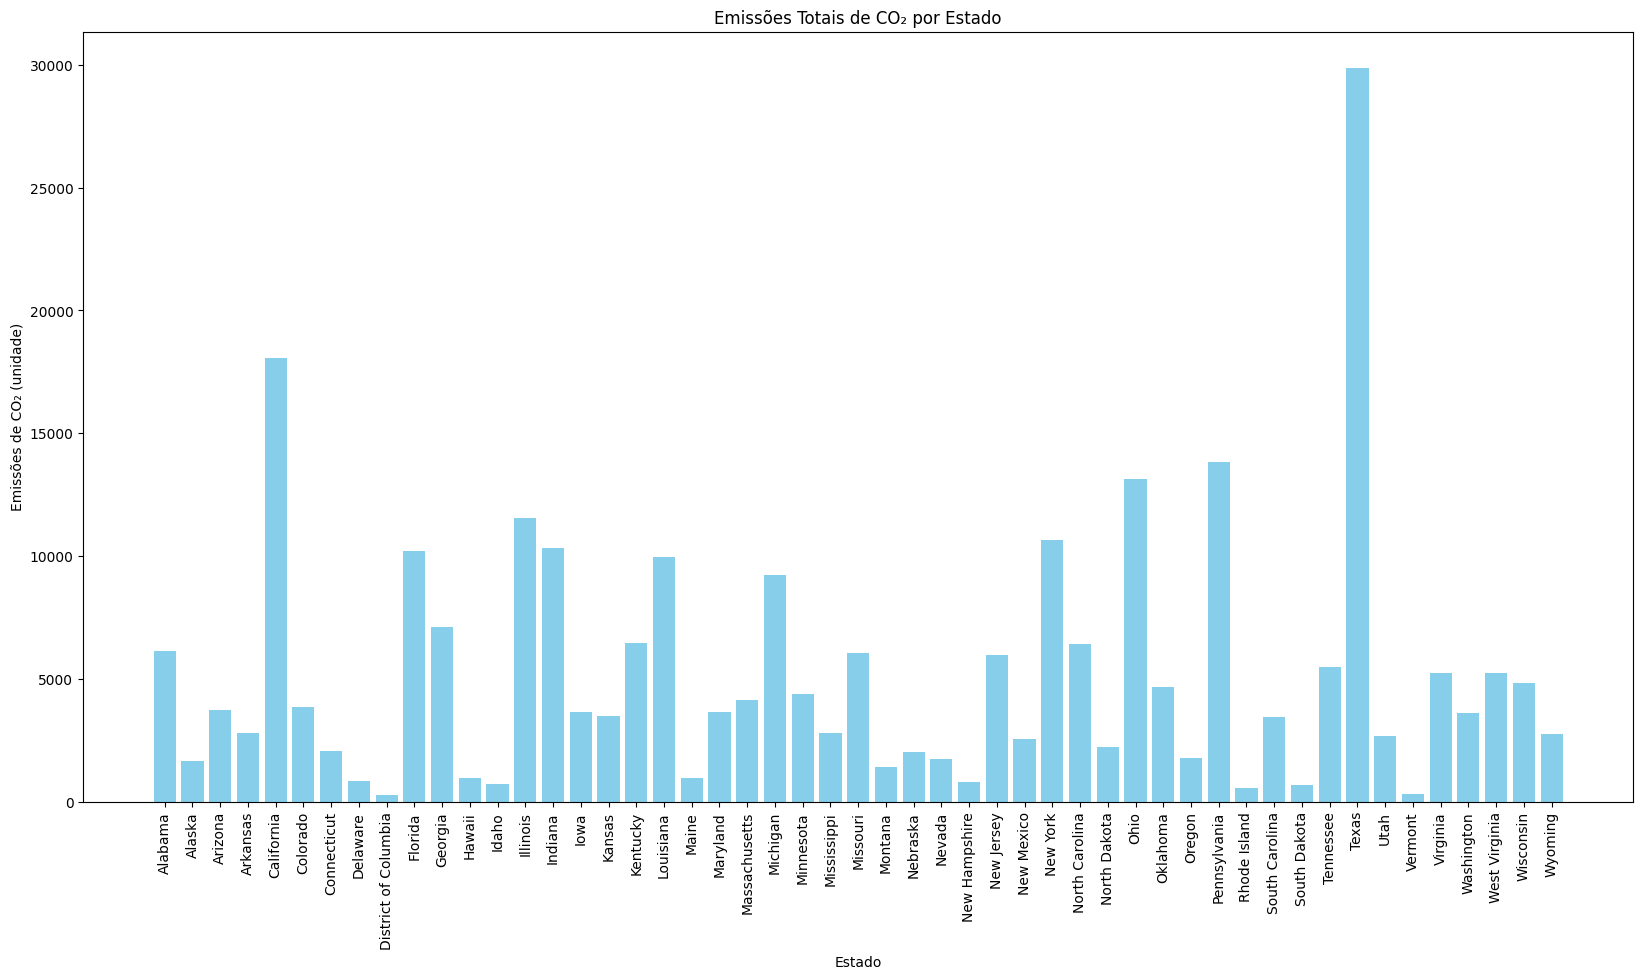

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plt.bar(df_co2_total_por_estado['state-name'], df_co2_total_por_estado['value'], color='skyblue')

plt.title('Emissões Totais de CO₂ por Estado')
plt.xlabel('Estado')
plt.ylabel('Emissões de CO₂ (unidade)')

plt.xticks(rotation=90)

plt.show()



In [ ]:
df_filtered = df[df['state-name'] != 'United States']
df_co2_filtered = df_filtered[df_filtered['sector-name'] == 'Total carbon dioxide emissions from all sectors']
df_co2_filtered = df_co2_filtered[df_co2_filtered['fuel-name'].isin(['Coal', 'Petroleum', 'Natural Gas'])]
df_co2_sum = df_co2_filtered.groupby(['state-name', 'fuel-name'])['value'].sum().unstack(fill_value=0)



# Gráfico que representa a emissão total de todos os anos por estado, separado por Tipo de Geração de Energia.



<Figure size 2000x1000 with 0 Axes>

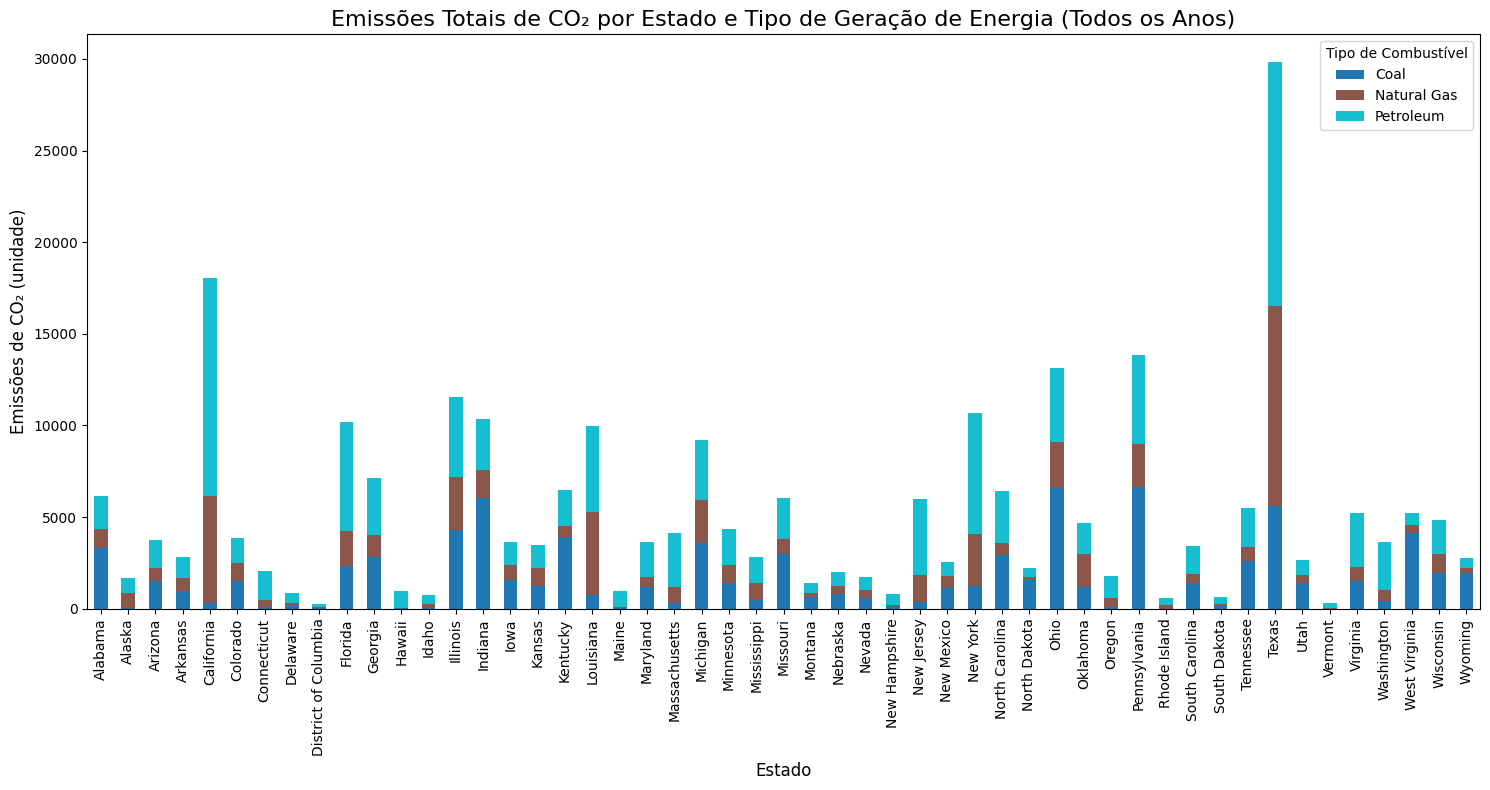

In [ ]:
plt.figure(figsize=(20, 10))
df_co2_sum.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab10')

plt.title('Emissões Totais de CO₂ por Estado e Tipo de Geração de Energia (Todos os Anos)', fontsize=16)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Emissões de CO₂ (unidade)', fontsize=12)
plt.legend(title="Tipo de Combustível", fontsize=10)

plt.tight_layout()
plt.show()


# Gráfico que representa a diferença de emissão por geração de energia ao longo dos anos nos EUA.

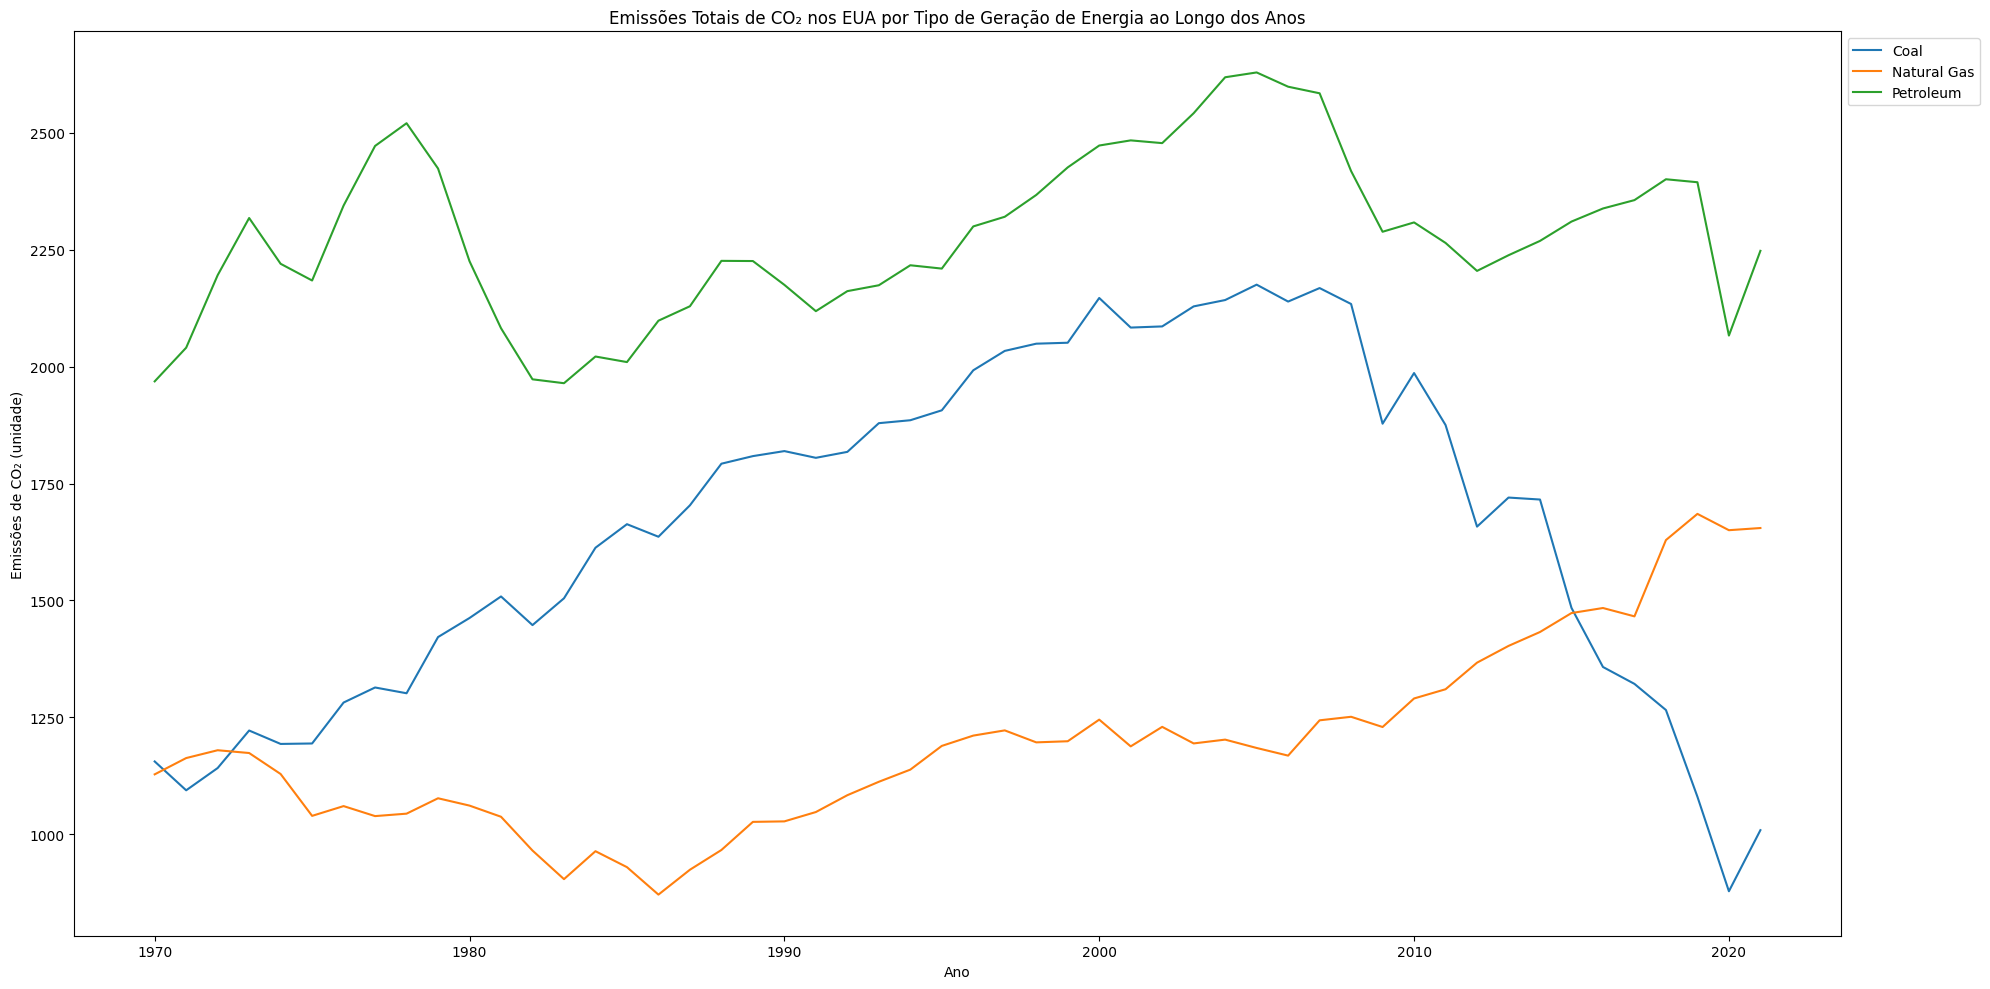

In [ ]:
df_filtered = df[df['state-name'] == 'United States']
df_co2_total = df_filtered[df_filtered['sector-name'] == 'Total carbon dioxide emissions from all sectors']
df_co2_total = df_co2_total[df_co2_total['fuel-name'] != 'All Fuels']

df_co2_total_eua = df_co2_total.groupby(['fuel-name', 'year'])['value'].sum().reset_index()

plt.figure(figsize=(20, 10))

for fuel in df_co2_total_eua['fuel-name'].unique():
    fuel_data = df_co2_total_eua[df_co2_total_eua['fuel-name'] == fuel]
    plt.plot(fuel_data['year'], fuel_data['value'], label=fuel)

plt.title('Emissões Totais de CO₂ nos EUA por Tipo de Geração de Energia ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO₂ (unidade)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

plt.show()



In [ ]:
df_filtered = df[df['state-name'] == 'United States']
df_co2_total = df_filtered[df_filtered['sector-name'] == 'Total carbon dioxide emissions from all sectors']
df_co2_total = df_co2_total[df_co2_total['fuel-name'] != 'All Fuels']

df_co2_total_por_estado = df_co2_total.groupby('fuel-name')['value'].sum().reset_index()



# Gráfico que representa a soma total da emissão de CO2 por tipo de combustível

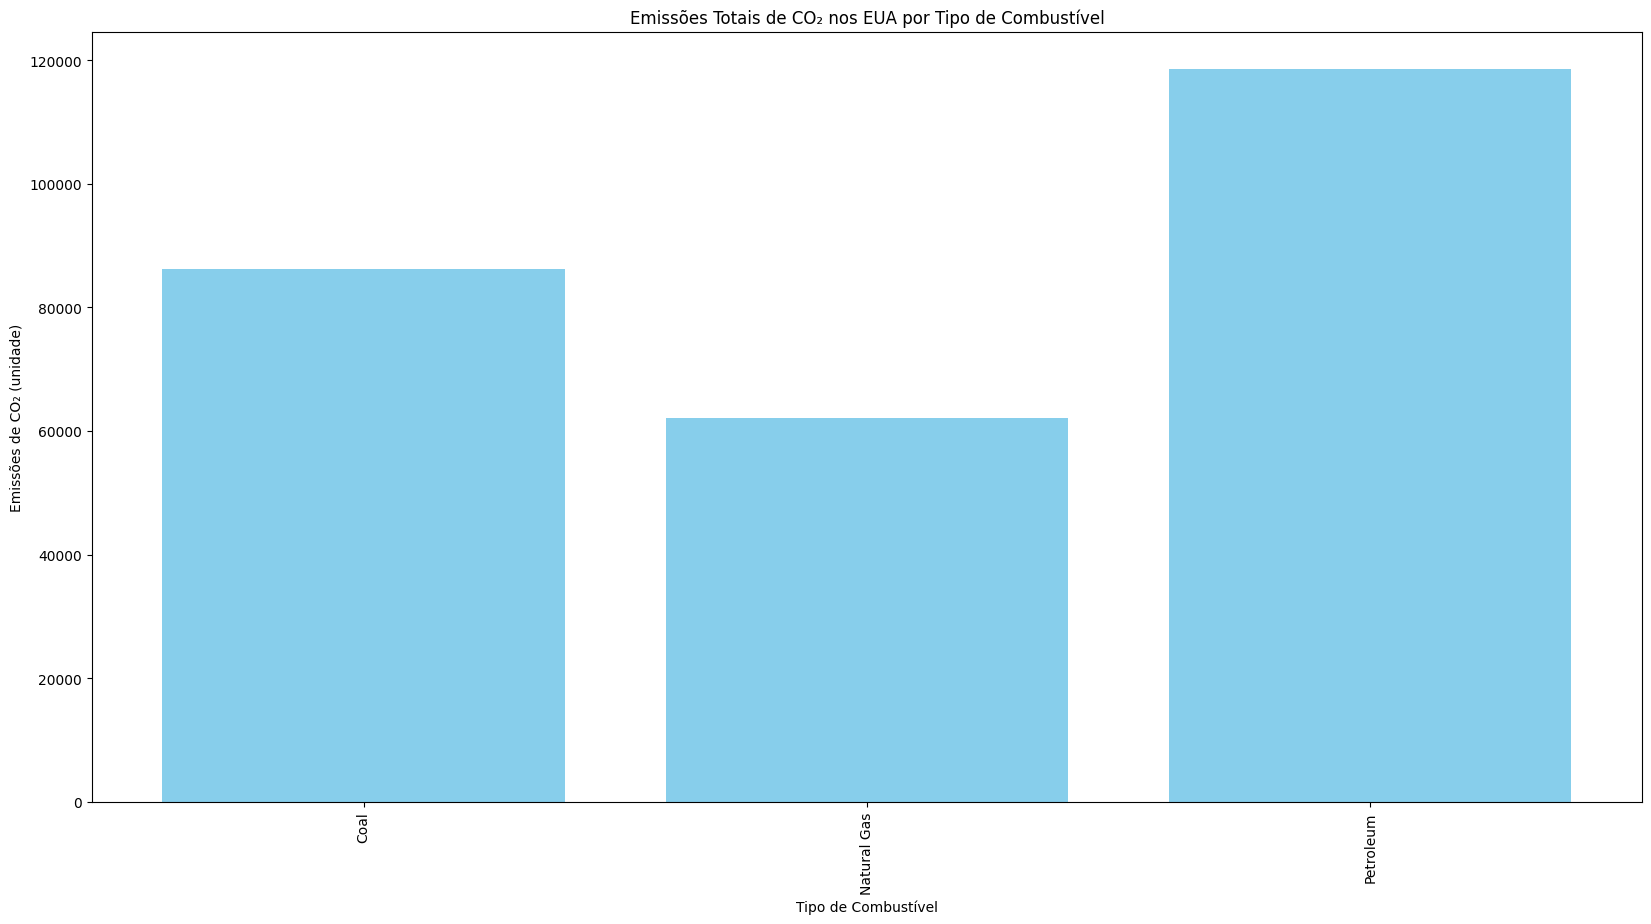

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(df_co2_total_por_estado['fuel-name'], df_co2_total_por_estado['value'], color='skyblue')
plt.title('Emissões Totais de CO₂ nos EUA por Tipo de Combustível')
plt.xlabel('Tipo de Combustível')
plt.ylabel('Emissões de CO₂ (unidade)')
plt.xticks(rotation=90)
plt.show()
